## Step 1: Load Data

In [16]:
import pandas as pd
df = pd.read_pickle('../data/cleaned_data.pkl')

## Step 2: Modeling - Random Forest

Accuracy: 0.80

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.48      0.56       373

    accuracy                           0.80      1409
   macro avg       0.75      0.70      0.71      1409
weighted avg       0.79      0.80      0.79      1409



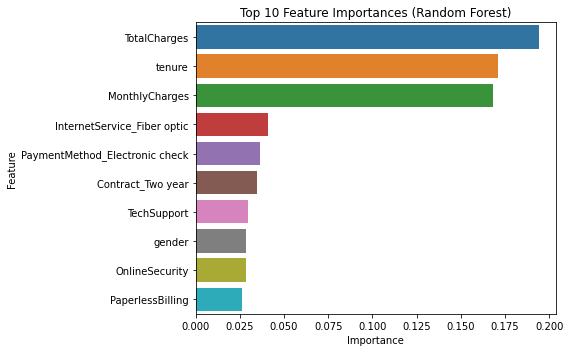

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define X and y
X = df.drop('Churn', axis=1)
y = df['Churn']

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 4. Predictions and performance
y_pred = rf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}\n')
print(classification_report(y_test, y_pred))

# 5. Feature Importance
importances = rf.feature_importances_
feat_names = X.columns
feat_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# 6. Plot top 10 features
plt.figure(figsize=(8, 5))
sns.barplot(data=feat_df.head(10), x='Importance', y='Feature')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()


The random forest model achieved 80% accuracy, with strong performance in identifying retained customers (class 0). However, recall for churned customers (class 1) was only 48%, indicating room for improvement. Feature importance analysis shows that total charges, tenure, and monthly charges are the top predictors of churn.

In [ ]:
plt.savefig('../output/feature_importance_rf.png')
rf_report = classification_report(y_test, rf.predict(X_test))
with open('../output/classification_report_rf.txt', 'w') as f:
    f.write(rf_report)

FileNotFoundError: [Errno 2] No such file or directory: 'output/classification_report_rf.txt'

<Figure size 432x288 with 0 Axes>

## Step 3: Modeling - XGBoost

Accuracy: 0.80
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1036
           1       0.67      0.52      0.59       373

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.73      1409
weighted avg       0.79      0.80      0.80      1409



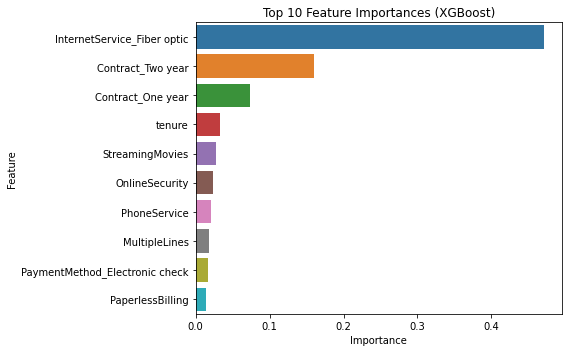

In [14]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Split data
X = df.drop('Churn', axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train XGBoost model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# 3. Predict & evaluate
y_pred = xgb.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')
print(classification_report(y_test, y_pred))

# 4. Feature Importance
importances = xgb.feature_importances_
feat_names = X.columns
feat_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# 5. Plot top 10 features
plt.figure(figsize=(8, 5))
sns.barplot(data=feat_df.head(10), x='Importance', y='Feature')
plt.title('Top 10 Feature Importances (XGBoost)')
plt.tight_layout()
plt.show()


In [ ]:
plt.savefig('../output/feature_importance_xgb.png')
xgb_report = classification_report(y_test, xgb.predict(X_test))
with open('output/classification_report_xgb.txt', 'w') as f:
    f.write(xgb_report)

<Figure size 432x288 with 0 Axes>

While both XGBoost and Random Forest achieved the same overall accuracy of 80%, their interpretations of feature importance differ. Random Forest emphasized cumulative features like total and monthly charges, whereas XGBoost focused more on categorical split variables like contract type and fiber optic service. This reflects the models' different mechanisms in learning patterns and splitting criteria. Furthermore, XGBoost has a slight better recall rate on churn customers than Random Forest.

## Step 4: Conclusion

In [ ]:
df.groupby('InternetService_Fiber optic')['Churn'].mean()

InternetService_Fiber optic
0    0.144920
1    0.418928
Name: Churn, dtype: float64

Given the consistent importance of fiber optics internet services across both Random Forest and XGBoost models, a deeper investigation was conducted. The analysis revealed that customers using fiber optic internet service have a significantly higher churn rate (41.9%) compared to those who do not (14.5%). This suggests that fiber optic users are more likely to churn, potentially due to higher costs, performance expectations, or competition from other providers. The consistent importance of this feature across both Random Forest and XGBoost confirms its strong predictive power.

In [10]:
df.groupby('Contract_Two year')['Churn'].mean()

Contract_Two year
0    0.340501
1    0.028319
Name: Churn, dtype: float64

Contract length also emerged as a strong predictor of churn across both models. Specifically, customers with two-year contracts had a remarkably low churn rate of just 2.8%, compared to 34.1% among those without. This substantial gap suggests that long-term contracts may play a key role in customer retention, likely due to commitment incentives or early termination fees. Given its high predictive value and strategic implications, contract type is a valuable lever for reducing churn.

We developed a machine learning model to predict customer churn and uncovered two high-impact drivers: long-term contracts and fiber optic internet service. These features not only boosted model accuracy but also provided actionable insights for retention strategy.

From a practical stand point of view, business can consider bundling fiber optic with long-term contracts.